### Integrating functions by using Monte Carlo method

The mean value of a given function $f(x)$ within the range $[a, b]$ is defined as follows:

\begin{equation*}
    \bar{f} = \frac{1}{b - a} \int _ a ^ b f(x) \, dx
\end{equation*}

On the other hand, one can compute the mean of the function in this way:

\begin{equation*}
    \bar{f} \approx \frac{1}{N} \sum _ {k = 1} ^ N f(x_k)
\end{equation*}

Where $x_k$ is an uniform distributed variable within the range $[a, b]$ and $N$ is a very large number. By combining these two, we obtain:

\begin{equation*}
    \int _ a ^ b f(x) \, dx \approx \frac{b - a}{N} \sum _ {k = 1} ^ N f(x_k)
\end{equation*}


In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
# Defining the function to integrate
@jit(nopython = True, nogil = True, fastmath = True)
def f(x):
    return (x * np.cos(x ** 2) * np.sin(x ** 2)) ** 2 * np.exp(- x ** 2)

In [3]:
# Defining the range
a = 0.0
b = 4.0

N = 150_000

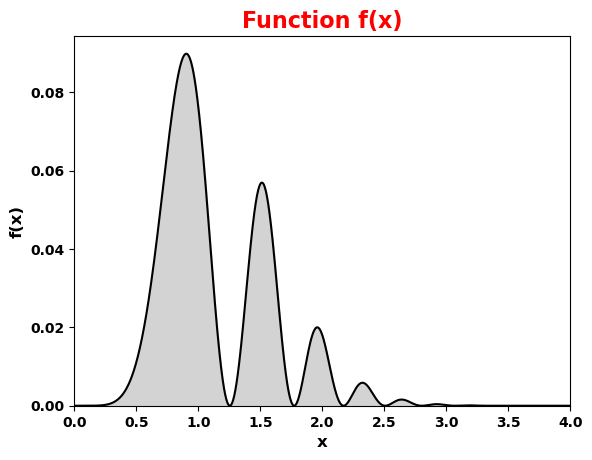

In [4]:
# Plotting the function within the range
x = np.linspace(a, b, N)
y = f(x)

plt.plot(x, y, color = "black")
plt.xlim(a, b)
plt.ylim(0)
plt.title("Function f(x)", fontweight = "bold", fontsize = 16, color = "red")
plt.xlabel("x", fontweight = "bold", fontsize = 12)
plt.ylabel("f(x)", fontweight = "bold", fontsize = 12)
plt.setp(plt.gca().get_xticklabels(), fontweight = "bold")
plt.setp(plt.gca().get_yticklabels(), fontweight= "bold")
plt.fill_between(x, y, color = "lightgray")
plt.show()

In [5]:
# Monte carlo integration
@jit(nopython = True, nogil = True, fastmath = True)
def integral(f, a, b, N):

    x = np.random.uniform(a, b, N)
    y = f(x)
    sum = np.sum(y) * (b - a) / N

    return sum

In [6]:
# Computing a few values
integral(f, a, b, N)

0.05777751558513555

In [7]:
integral(f, a, b, N)

0.0579840884958299

In [8]:
integral(f, a, b, N)

0.05831407420715527

In [9]:
# Monte Carlo integration
@jit(nopython = True, nogil = True, fastmath = True)
def integral_array(f, a, b, N):

    M = int(N / 2)
    values = np.zeros(M)

    i = 0

    while(i < M):

        values[i] = integral(f, a, b, N)
        i = i + 1
    
    return values

In [10]:
# Computing an array of values
values = integral_array(f, a, b, N)

In [11]:
# Mean of the distribution
integral = np.mean(values)
integral

0.05807473148053563

In [12]:
# Standard deviation of the distribution
error = np.std(values)
error

0.0002482135614461795

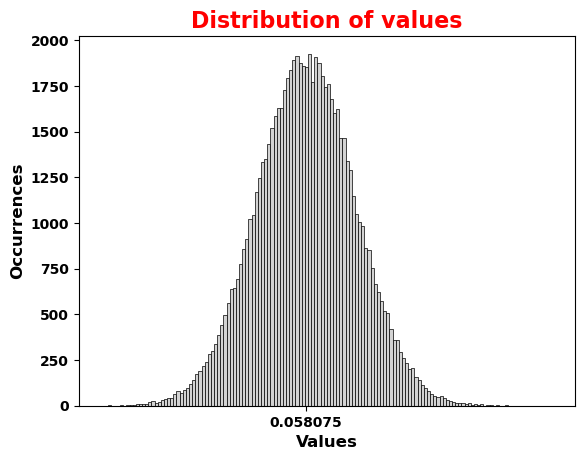

In [13]:
# Histogram of values
plt.hist(values, bins = "auto", color = "lightgray", edgecolor = "black", linewidth = 0.5)
plt.title("Distribution of values", fontweight = "bold", fontsize = 16, color = "red")
plt.xlabel("Values", fontweight = "bold", fontsize = 12)
plt.ylabel("Occurrences", fontweight = "bold", fontsize = 12)
plt.setp(plt.gca().get_xticklabels(), fontweight = "bold")
plt.xticks([integral])
plt.setp(plt.gca().get_yticklabels(), fontweight= "bold")
plt.show()

By using this method, we've found the result: $0.0581 \pm 0.0002 \, (0.3 \%)$

In [14]:
# Computing the integral using quad from scipy.optimize module
from scipy.integrate import quad

quad(f, a, b)[0]

0.05807433721510848